## importing libraries and exploring the data

In [183]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [184]:
df = pd.read_csv('/content/Weather Dataset.csv')

In [185]:
df.shape

(3780, 12)

In [186]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [187]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000
mean,9.473088,8.909559,0.280862,10.067603,200.250529,8.279035,-0.529101,995.943513
std,33.839341,9.863589,32.543577,6.029814,91.711950,32.992211,32.530002,148.644604
min,-2000.000000,-11.911111,-2000.000000,0.000000,0.000000,-2000.000000,-2000.000000,0.000000
25%,2.102778,-0.401389,0.710000,5.296900,145.000000,5.264700,0.000000,1010.760000
50%,10.250000,10.269444,0.860000,9.418500,192.000000,9.982000,0.000000,1015.180000
75%,17.088889,17.088889,0.930000,13.737325,280.000000,11.270000,0.000000,1023.590000
max,32.638889,35.494444,1.000000,36.386000,359.000000,16.100000,0.000000,1042.310000


In [188]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [189]:
df.duplicated().sum()

1259

In [190]:
df.drop_duplicates(inplace=True)

In [191]:
df.shape

(2521, 12)

## detect and remove outlairs using (IQR)

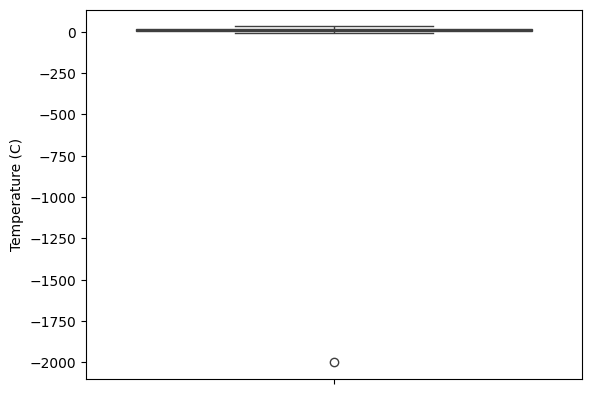

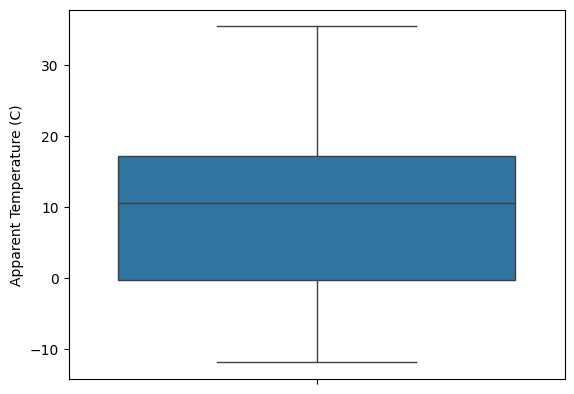

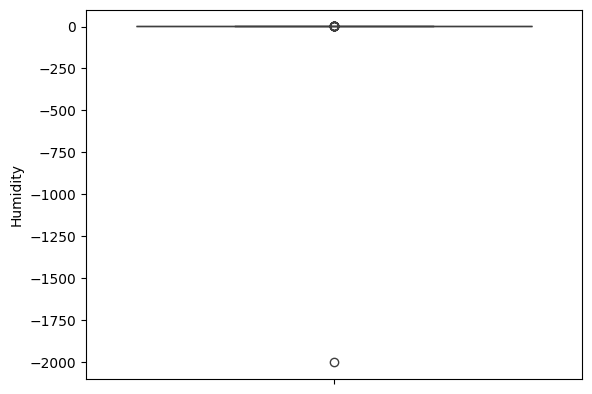

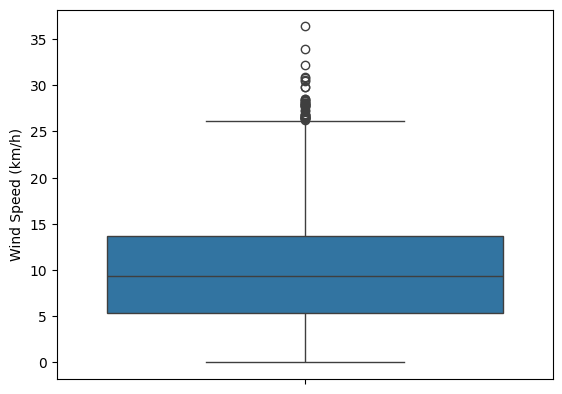

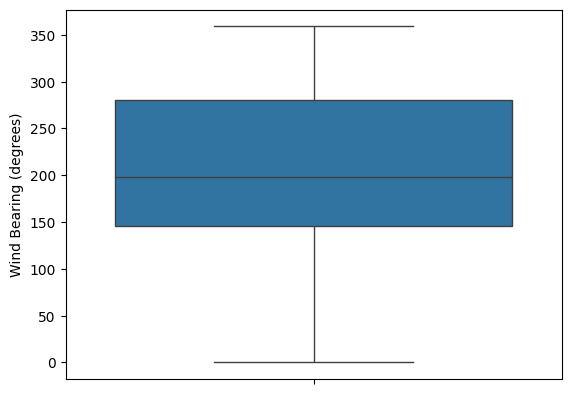

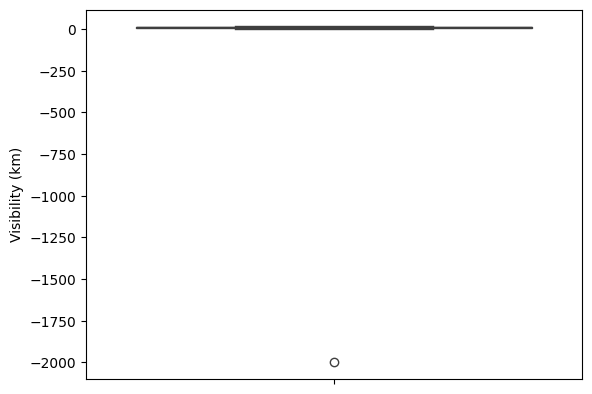

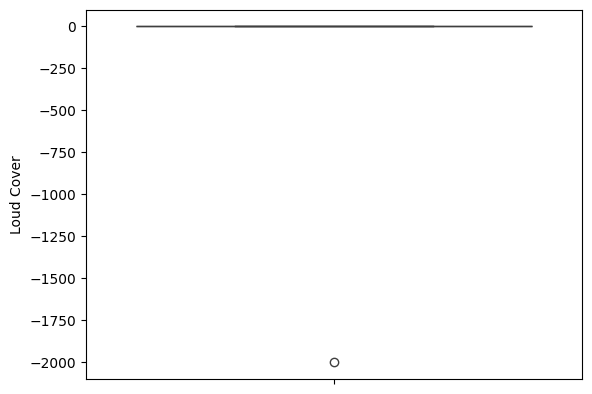

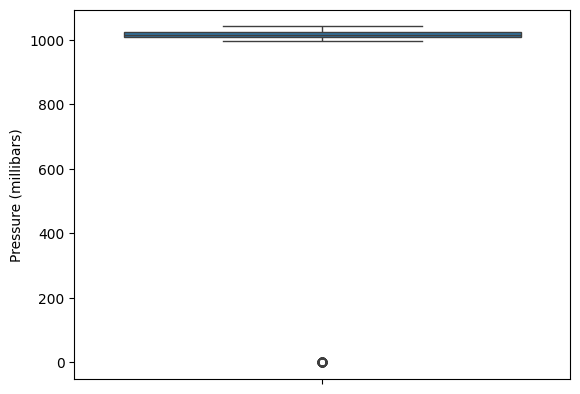

In [192]:
sns.boxplot(df['Temperature (C)'])
plt.show()
sns.boxplot(df['Apparent Temperature (C)'])
plt.show()
sns.boxplot(df['Humidity'])
plt.show()
sns.boxplot(df['Wind Speed (km/h)'])
plt.show()
sns.boxplot(df['Wind Bearing (degrees)'])
plt.show()
sns.boxplot(df['Visibility (km)'])
plt.show()
sns.boxplot(df['Loud Cover'])
plt.show()
sns.boxplot(df['Pressure (millibars)'])
plt.show()

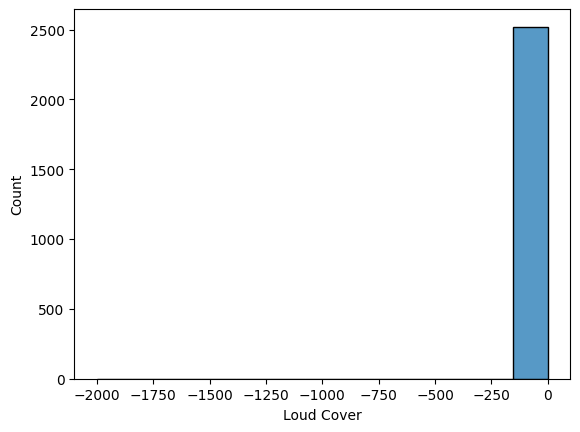

In [193]:
sns.histplot(df['Loud Cover'])
plt.show()

In [209]:
#  drop the load cover as all its values are zeros
df = df.drop('Loud Cover', axis=1)

-20.33611111111111

39.641666666666666

<ipython-input-201-75ce0756ec3c>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature (C)'])


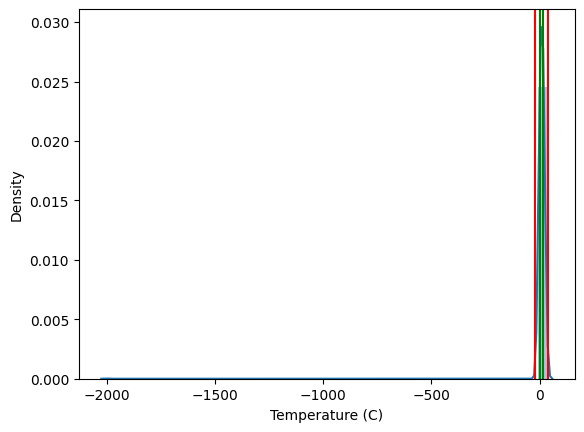

In [201]:
Q1 = df['Temperature (C)'].quantile(0.25)
Q3 = df['Temperature (C)'].quantile(0.75)

IQR = Q3 - Q1

LC = Q1 - (1.5 * IQR)
UC = Q3 + (1.5 * IQR)

display(LC)
display(UC)

sns.distplot(df['Temperature (C)'])
plt.axvline(UC, color='r')
plt.axvline(LC, color='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')

df = df[(df['Temperature (C)'] > LC) & (df['Temperature (C)'] < UC)]

0.37999999999999984

1.2600000000000002

<ipython-input-202-2eaed0cfce1f>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Humidity'])


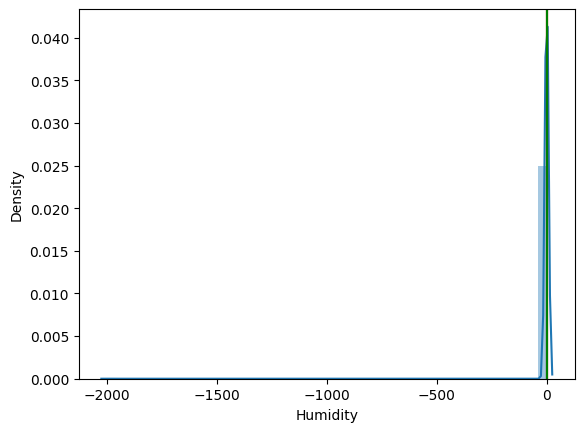

In [202]:
Q1 = df['Humidity'].quantile(0.25)
Q3 = df['Humidity'].quantile(0.75)

IQR = Q3 - Q1

LC = Q1 - (1.5 * IQR)
UC = Q3 + (1.5 * IQR)

display(LC)
display(UC)

sns.distplot(df['Humidity'])
plt.axvline(UC, color='r')
plt.axvline(LC, color='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')

df = df[(df['Humidity'] > LC) & (df['Humidity'] < UC)]

-7.212800000000003

26.210800000000006

<ipython-input-204-3e90dff6cc55>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Wind Speed (km/h)'])


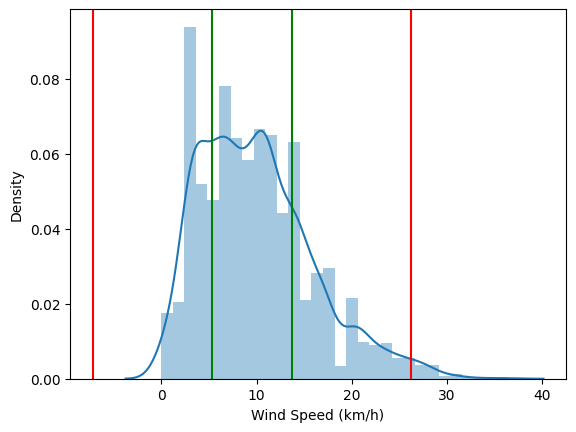

In [204]:
Q1 = df['Wind Speed (km/h)'].quantile(0.25)
Q3 = df['Wind Speed (km/h)'].quantile(0.75)

IQR = Q3 - Q1

LC = Q1 - (1.5 * IQR)
UC = Q3 + (1.5 * IQR)

display(LC)
display(UC)

sns.distplot(df['Wind Speed (km/h)'])
plt.axvline(UC, color='r')
plt.axvline(LC, color='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')

df = df[(df['Wind Speed (km/h)'] > LC) & (df['Wind Speed (km/h)'] < UC)]

-3.8639999999999963

20.350399999999997

<ipython-input-206-28cd36f0eb2f>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Visibility (km)'])


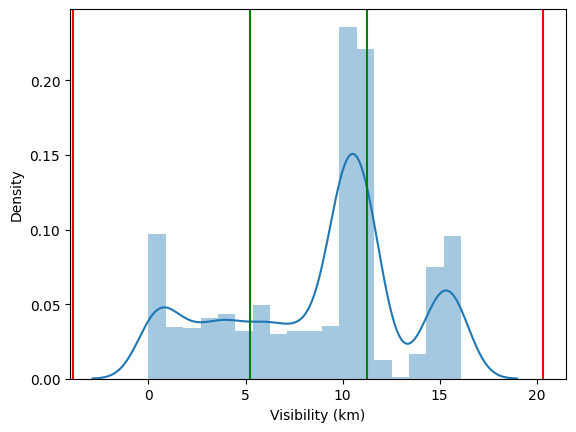

In [206]:
Q1 = df['Visibility (km)'].quantile(0.25)
Q3 = df['Visibility (km)'].quantile(0.75)

IQR = Q3 - Q1

LC = Q1 - (1.5 * IQR)
UC = Q3 + (1.5 * IQR)

display(LC)
display(UC)

sns.distplot(df['Visibility (km)'])
plt.axvline(UC, color='r')
plt.axvline(LC, color='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')

df = df[(df['Visibility (km)'] > LC) & (df['Visibility (km)'] < UC)]

991.77

1042.77

<ipython-input-210-ad4d03c1573f>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pressure (millibars)'])


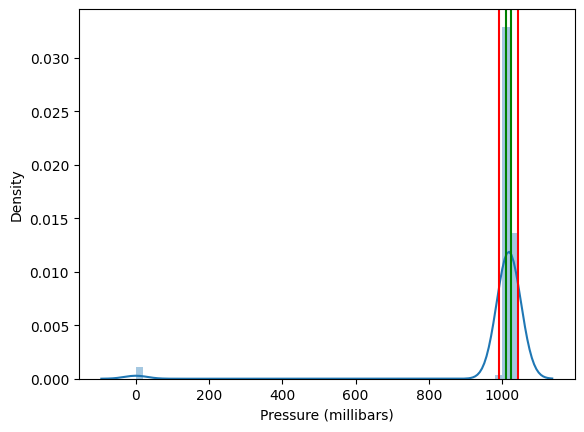

In [210]:
Q1 = df['Pressure (millibars)'].quantile(0.25)
Q3 = df['Pressure (millibars)'].quantile(0.75)

IQR = Q3 - Q1

LC = Q1 - (1.5 * IQR)
UC = Q3 + (1.5 * IQR)

display(LC)
display(UC)

sns.distplot(df['Pressure (millibars)'])
plt.axvline(UC, color='r')
plt.axvline(LC, color='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')

df = df[(df['Pressure (millibars)'] > LC) & (df['Pressure (millibars)'] < UC)]

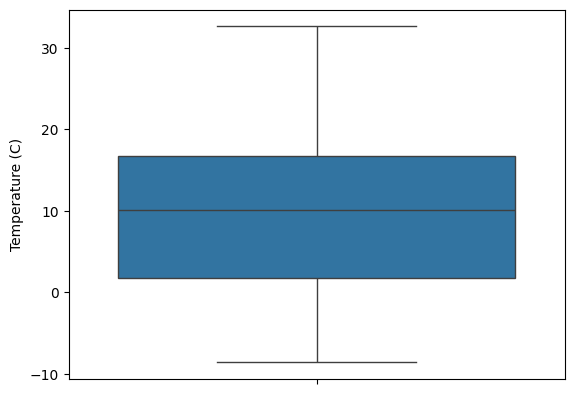

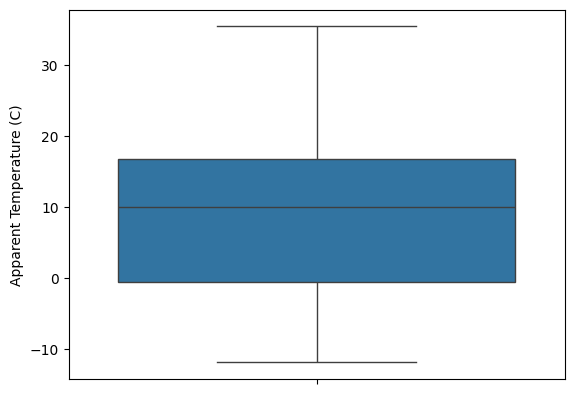

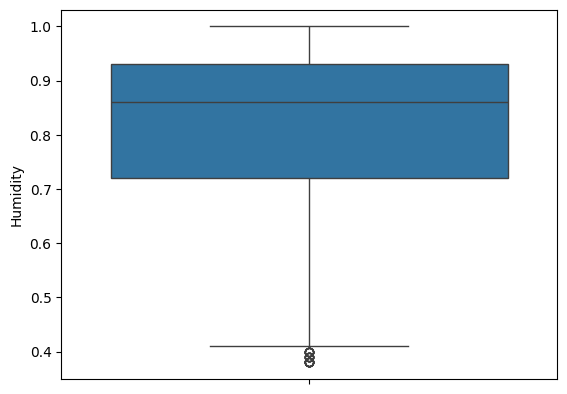

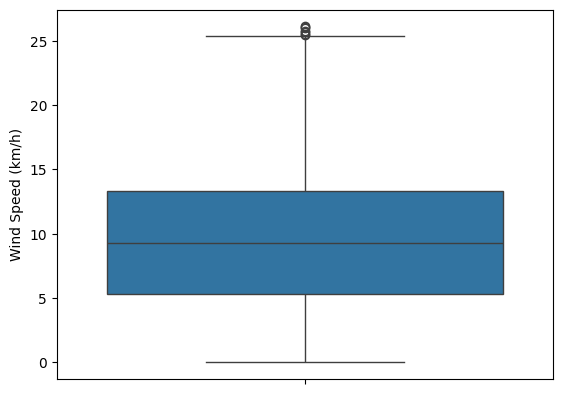

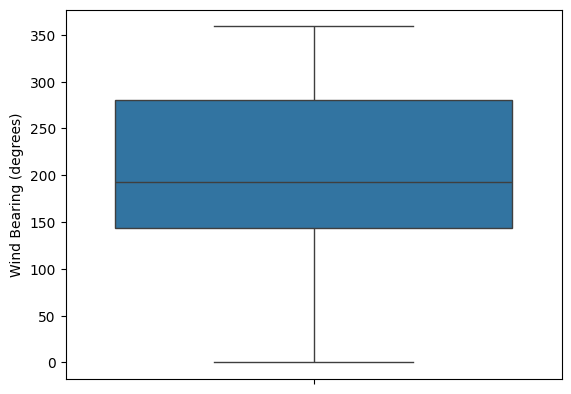

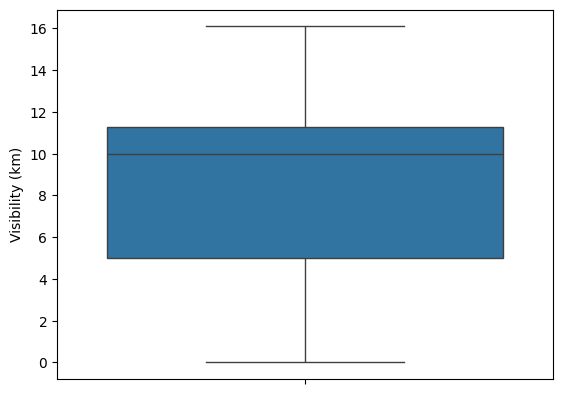

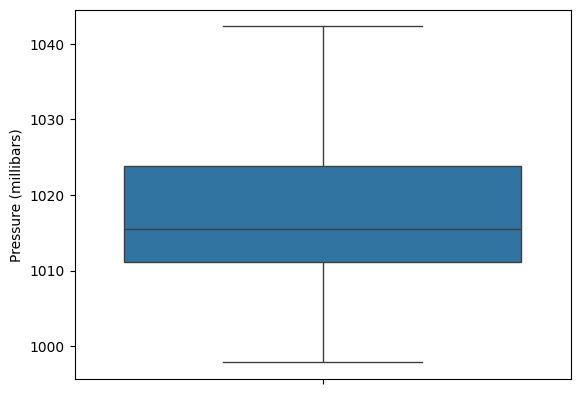

In [211]:
sns.boxplot(df['Temperature (C)'])
plt.show()
sns.boxplot(df['Apparent Temperature (C)'])
plt.show()
sns.boxplot(df['Humidity'])
plt.show()
sns.boxplot(df['Wind Speed (km/h)'])
plt.show()
sns.boxplot(df['Wind Bearing (degrees)'])
plt.show()
sns.boxplot(df['Visibility (km)'])
plt.show()
sns.boxplot(df['Pressure (millibars)'])
plt.show()

## histogram of temperature distribution.

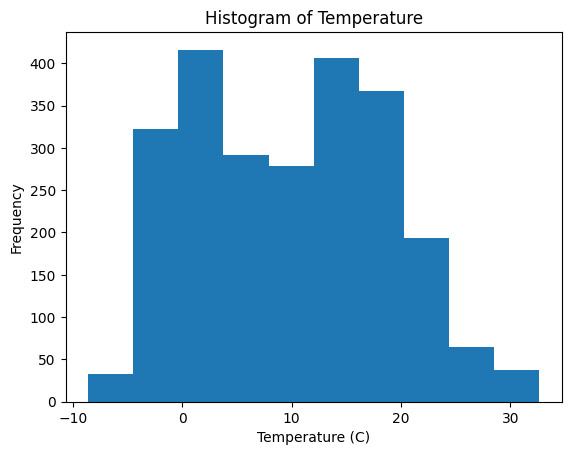

In [218]:
plt.hist(df['Temperature (C)', ])
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.show()

## scatter plot of temperature vs. humidity.

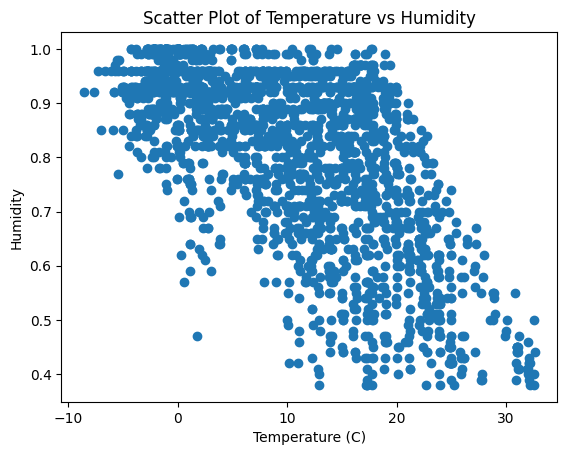

In [223]:
plt.scatter(df['Temperature (C)'], df['Humidity'])
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.title('Scatter Plot of Temperature vs Humidity')
plt.show()

## correlation heatmap of the dataset

In [232]:
df_without_object = df.select_dtypes(exclude=['object'])  # Exclude object data types

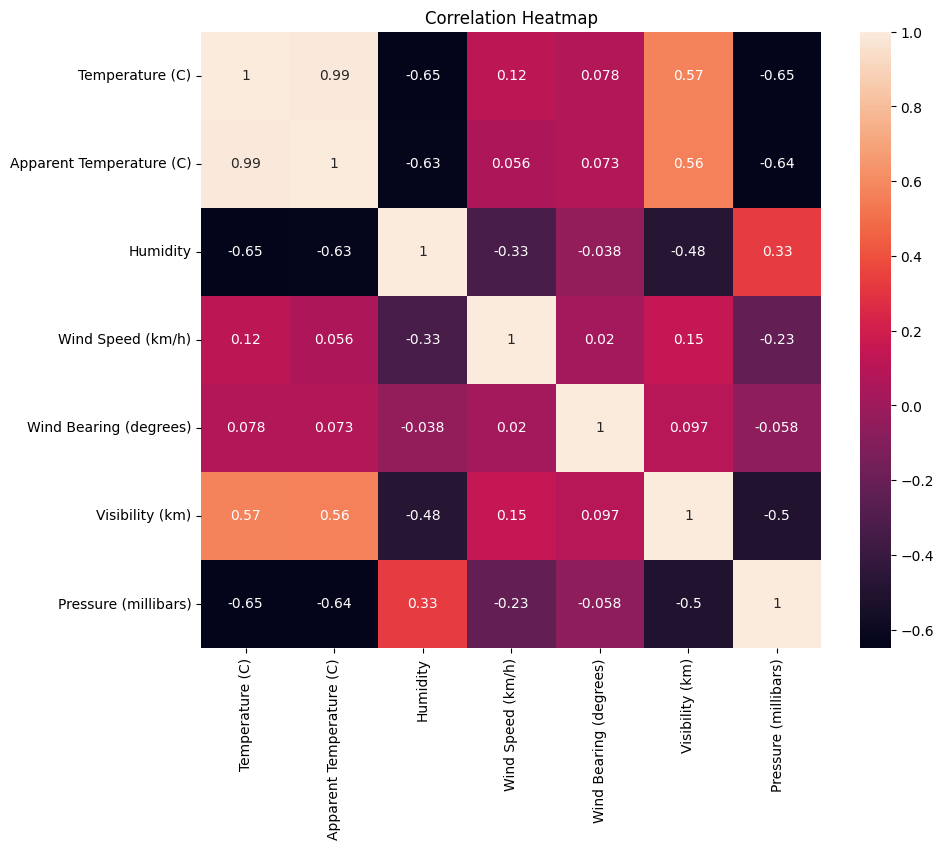

In [233]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_without_object.corr(), annot=True,)
plt.title('Correlation Heatmap')
plt.show()

using heatmap and data correlation i found this :

- temperature (C) is directly proportional with Apparent Temperature (C) (very strong corrolation)
- temperature (C) is directly proportional with Visibility (km) (medium corrolation)
- temprature (C) is inversly proportional with Humidity and pressure (medium corrolation)
- tempreature has weak corrolation with Wind Speed (km/h) , Wind Bearing (degrees)

In [234]:
df_without_object.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.993020,-0.647937,0.123984,0.077681,0.573008,-0.647270
Apparent Temperature (C),0.993020,1.000000,-0.632958,0.055658,0.073094,0.564698,-0.638415
Humidity,-0.647937,-0.632958,1.000000,-0.326143,-0.038390,-0.477151,0.327917
Wind Speed (km/h),0.123984,0.055658,-0.326143,1.000000,0.020010,0.150062,-0.225740
Wind Bearing (degrees),0.077681,0.073094,-0.038390,0.020010,1.000000,0.097206,-0.058191
Visibility (km),0.573008,0.564698,-0.477151,0.150062,0.097206,1.000000,-0.504408
Pressure (millibars),-0.647270,-0.638415,0.327917,-0.225740,-0.058191,-0.504408,1.000000
